In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from scipy import stats
import re

# Date time
from datetime import datetime

# PLotly express
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
import xlrd

#Pandas Profiling
import pandas_profiling

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data Load
Load Necessary Files

In [5]:
msi = pd.read_csv(r'MSI.csv')
neighborhood = pd.read_csv(r'Neighborhoods.csv')
df_neighbors = neighborhood.iloc[:,6:]

In [6]:
df_neighbors.columns

Index(['Subopic-Characteristic', 'City of Toronto', '129', '128', '20', '95',
       '42', '34', '76', '52',
       ...
       '37', '7', '137', '64', '60', '94', '100', '97', '27', '31'],
      dtype='object', length=142)

In [7]:
df_neighbors = df_neighbors.T.reset_index()

In [8]:
display(df_neighbors.head())
msi.head()

,index,0,1,2,3,4,5,6,7,8,...,293,294,295,296,297,298,299,300,301,302
0,Subopic-Characteristic,Population density per square kilometre-Popula...,Age characteristics-Children (0-14 years),Age characteristics-Youth (15-24 years),Age characteristics-Working Age (25-54 years),Age characteristics-Pre-retirement (55-64 years),Age characteristics-Seniors (65+ years),Age characteristics-Older Seniors (85+ years),Age characteristics-Male: 0 to 04 years,Age characteristics-Male: 05 to 09 years,...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...,Selected places of birth for the immigrant pop...
1,City of Toronto,4334,398135,340270,1229555,336670,426945,66000,69895,69350,...,3985,26830,6010,34750,118775,52900,5575,7695,30580,52450
2,129,3929,3840,3705,11305,4230,6045,925,660,695,...,45,65,20,295,1180,2210,10,115,495,600
3,128,3034,3075,3360,9965,3265,4105,555,575,540,...,25,65,50,435,1030,1070,40,140,330,460
4,20,2435,1760,1235,5220,1825,2015,320,360,270,...,10,40,35,15,420,25,0,0,35,85


,Hood_ID,Neighbourhoods_Proper,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Grand Total
0,1,West Humber-Clairville,1375,1684,658,376,245,4338
1,2,Mount Olive-Silverstone-Jamestown,1319,292,168,460,18,2257
2,3,Thistletown-Beaumond Heights,284,109,104,103,12,612
3,4,Rexdale-Kipling,358,137,90,100,9,694
4,5,Elms-Old Rexdale,323,96,63,93,6,581


In [9]:
df_neighbors.columns = df_neighbors.iloc[0].to_list()

#Drop unecessary rows
df_neighbors = df_neighbors.drop(0, axis=0)
df_neighbors = df_neighbors.drop(1, axis=0)

#Reset the index
df_neighbors.reset_index(inplace=True, drop= True)

In [10]:
msi['Hood_ID'] = msi['Hood_ID'].astype(str)

In [11]:
df = pd.merge(msi,df_neighbors, right_on = 'Subopic-Characteristic', left_on= 'Hood_ID', how = 'left').drop('Hood_ID', axis = 1)

## Preprocessing

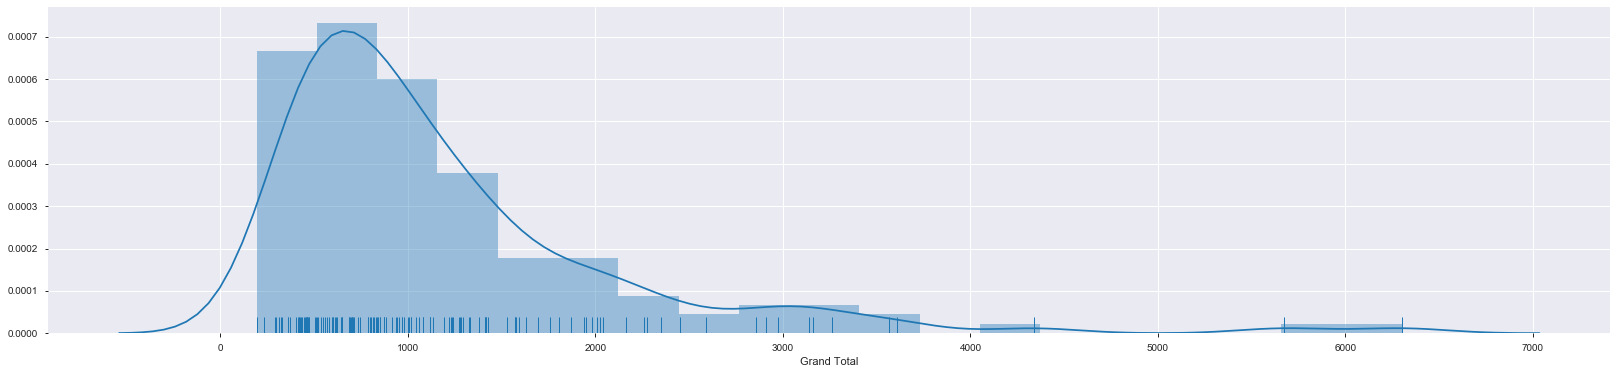

In [12]:
plt.figure(figsize= (28,6))
sns.distplot(df['Grand Total'], hist=True, rug=True);

In [73]:
#Change to int
df.iloc[:,1:] = df.iloc[:,1:].astype(int)

#Move neighborhood id to front and assign to index - in place
mid = df['Subopic-Characteristic']
df.drop(labels=['Subopic-Characteristic'], axis=1,inplace = True)
df.insert(0, 'id', mid)
df.set_index('id', drop = True, inplace= True)

KeyError: 'Subopic-Characteristic'

In [88]:
corr = df.corr()
corr = round(pd.DataFrame.from_records(corr[['Assault' ,'Auto Theft', 'Break and Enter', 'Robbery','Theft Over', 'Grand Total']],index = list(corr.columns)).sort_values(by=['Grand Total']),2)

In [103]:
corr[corr['Grand Total'] > .7]

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Grand Total
"Total - Household total income groups in 2015 for private households - 100% data-$30,000 to $34,999",0.72,0.32,0.62,0.60,0.55,0.71
"Total - Household total income groups in 2015 for private households - 100% data-$45,000 to $49,999",0.71,0.33,0.65,0.58,0.59,0.71
"Total - Household total income groups in 2015 for private households - 100% data-$70,000 to $79,999",0.71,0.33,0.70,0.51,0.66,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$60,000 to $69,999",0.72,0.33,0.69,0.53,0.65,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$40,000 to $44,999",0.73,0.33,0.64,0.60,0.58,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$50,000 to $59,999",0.72,0.34,0.67,0.57,0.62,0.72
Age characteristics-Working Age (25-54 years),0.72,0.32,0.73,0.54,0.66,0.72
Age characteristics-Male: 25 to 29 years,0.74,0.24,0.72,0.50,0.70,0.72
"Total - Household total income groups in 2015 for private households - 100% data-$20,000 to $24,999",0.76,0.23,0.66,0.60,0.57,0.73
"Total - Household total income groups in 2015 for private households - 100% data-$35,000 to $39,999",0.73,0.33,0.64,0.62,0.58,0.73


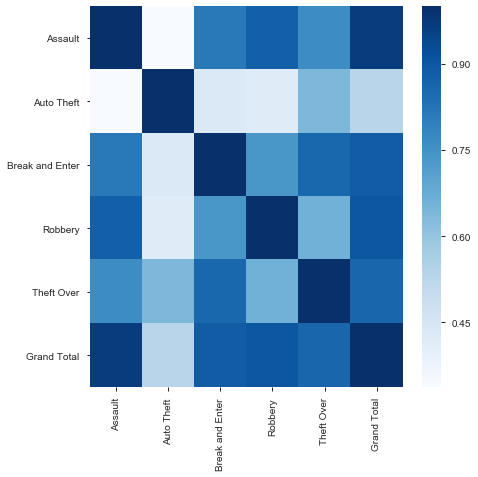

In [97]:
plt.figure(figsize=(7,7))
sns.heatmap(msi.corr(), cmap = 'Blues')

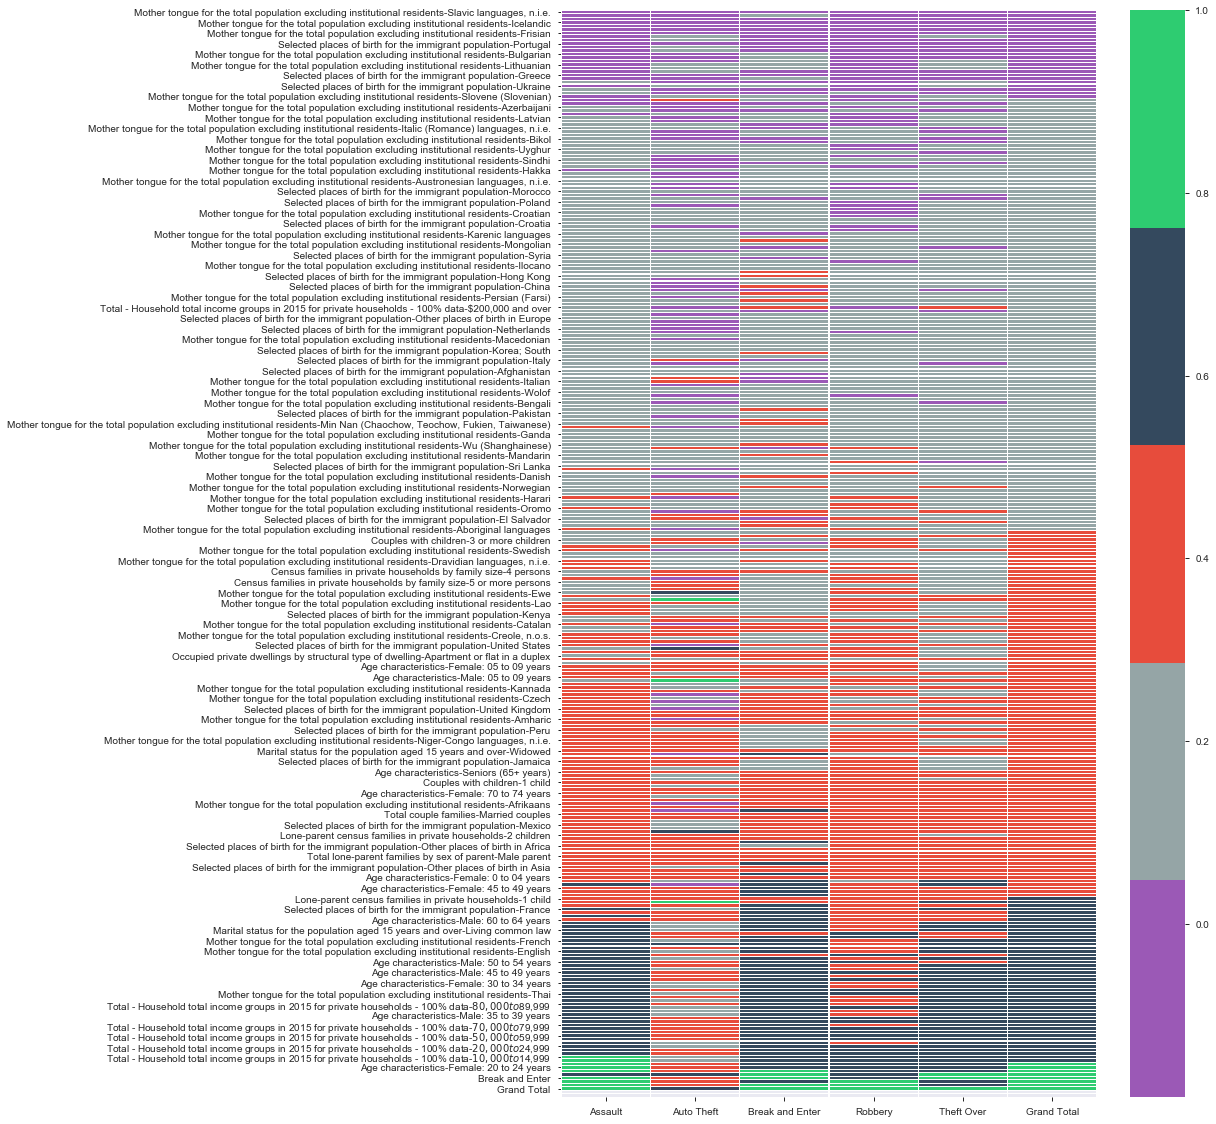

In [90]:
plt.figure(figsize = (12,20))
sns.heatmap(corr, cmap = ["#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],linecolor = 'white', linewidth = .05)

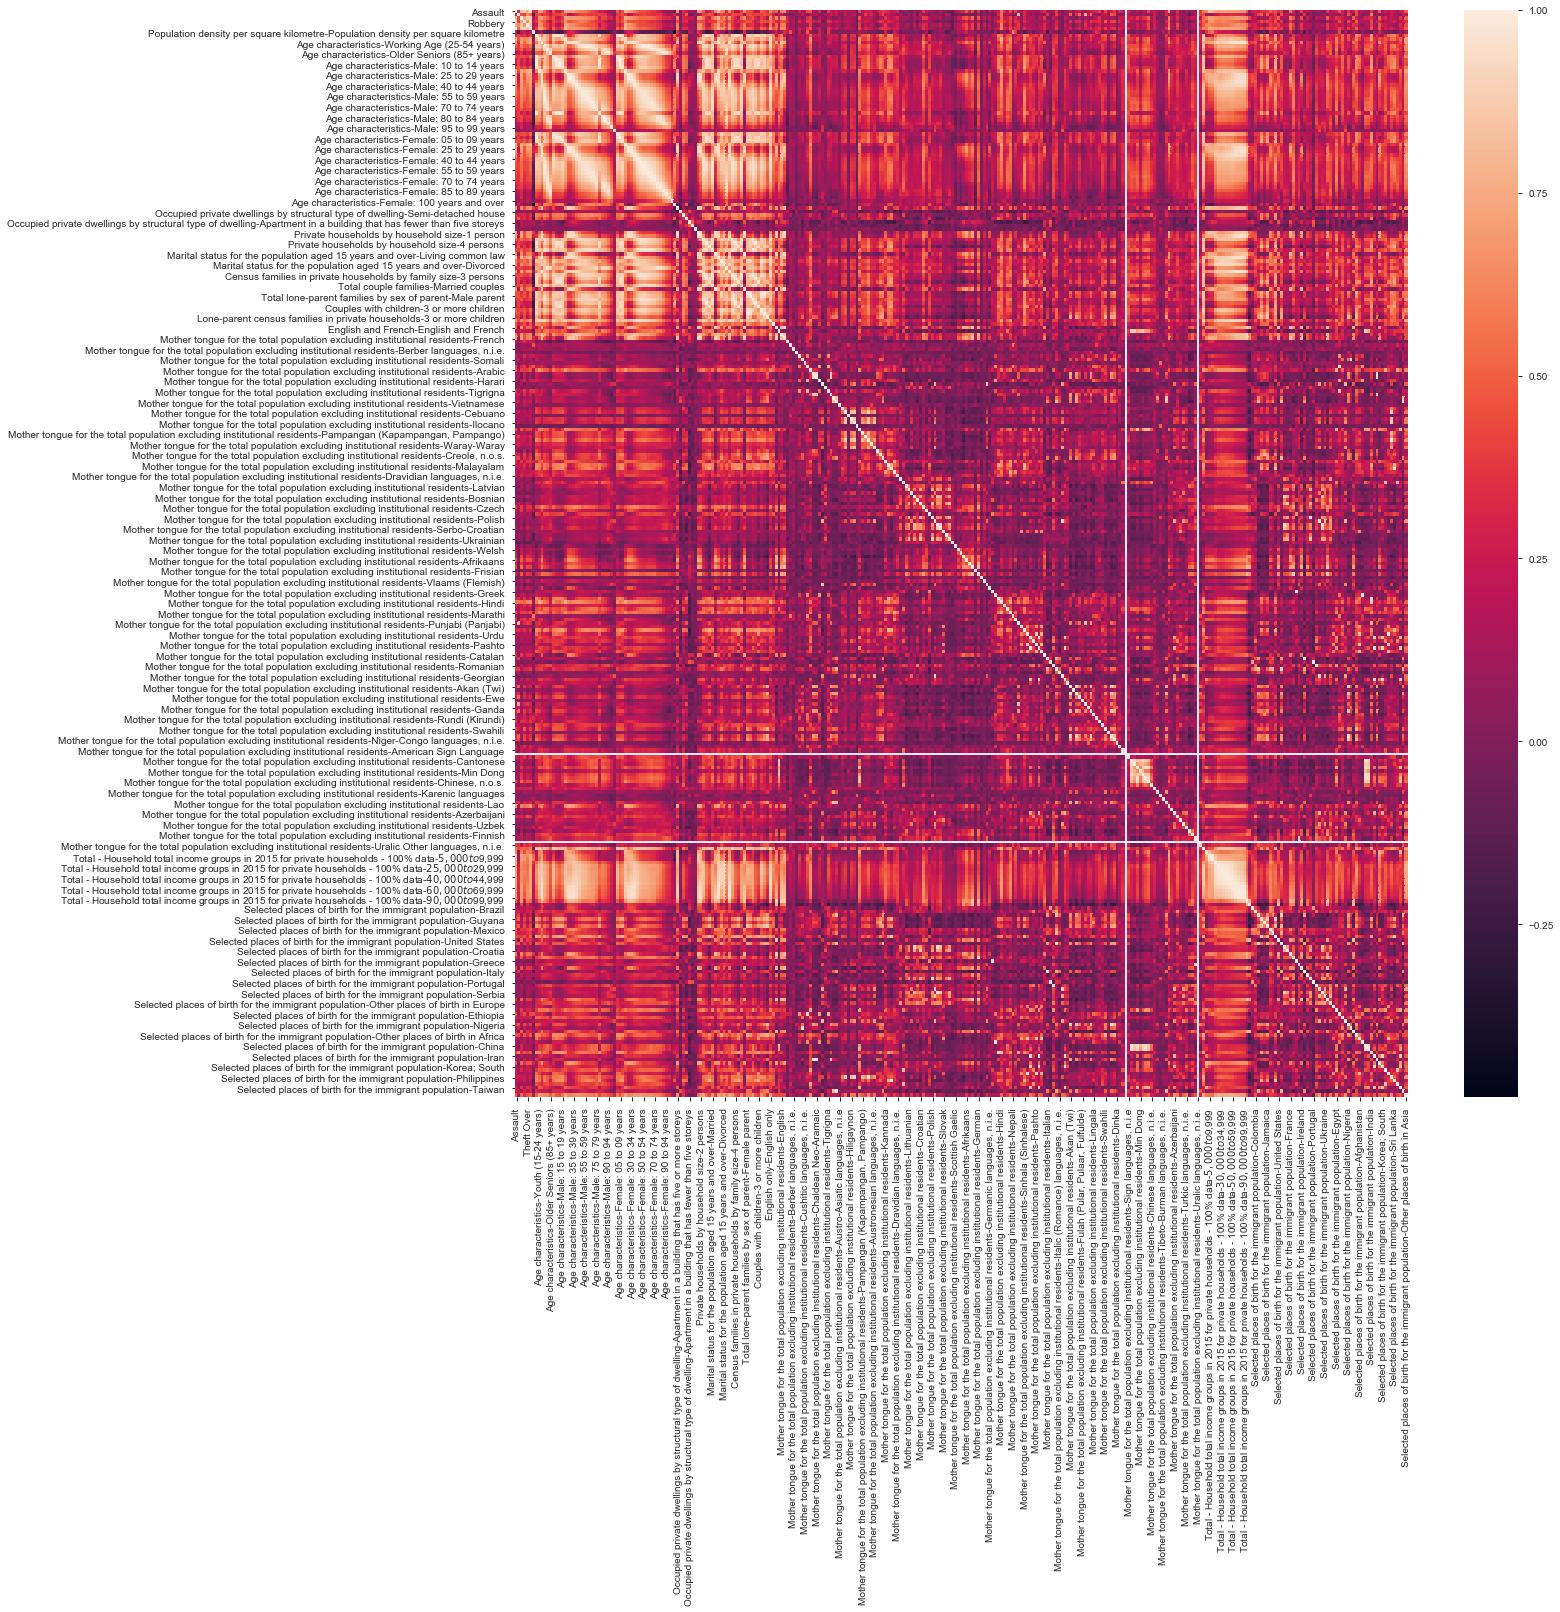

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

#### Data Augmentation